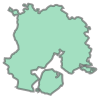

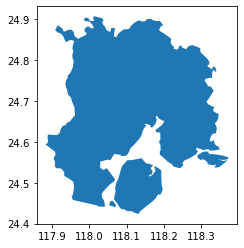

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point,Polygon,shape

shp = r'D:/cs/xm/data/XM/市区.shp'
xm = geopandas.GeoDataFrame.from_file(shp)

xm.plot()
xm.unary_union

In [3]:
#栅格化代码
import math

testlon = 118
testlat = 24.6
#栅格的经纬度
lon1 = 117.882223
lon2 = 118.373857
lat1 = 24.423747
lat2 = 24.907270

latStart = min(lat1, lat2);
lonStart = min(lon1, lon2);

#定义栅格大小(单位m)
accuracy = 500;

#栅格的经纬度长度
deltaLon = accuracy * 360 / (2 * math.pi * 6371004 * math.cos((lat1 + lat2) * math.pi / 360));
deltaLat = accuracy * 360 / (2 * math.pi * 6371004);

#栅格的经纬度坐标
LONCOL=divmod(float(testlon) - (lonStart - deltaLon / 2) , deltaLon)[0]
LATCOL=divmod(float(testlat) - (latStart - deltaLat / 2) , deltaLat)[0]

#栅格的中心点
HBLON = LONCOL*deltaLon + (lonStart - deltaLon / 2)
HBLAT = LATCOL*deltaLat + (latStart - deltaLat / 2)

#LONCOL,LATCOL,HBLON,HBLAT,deltaLon,deltaLat

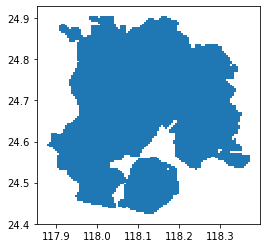

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point,Polygon,shape



data = geopandas.GeoDataFrame()


LONCOL = []
LATCOL = []
geometry = []
HBLON1 = []
HBLAT1 = []

#栅格数量
lonsnum = int((lon2-lon1)/deltaLon)+1
latsnum = int((lat2-lat1)/deltaLat)+1

for i in range(lonsnum):
    for j in range(latsnum):

        HBLON = i*deltaLon + (lonStart - deltaLon / 2)
        HBLAT = j*deltaLat + (latStart - deltaLat / 2)
        
        LONCOL.append(i)
        LATCOL.append(j)
        HBLON1.append(HBLON)
        HBLAT1.append(HBLAT)
        
        #生成栅格的Polygon
        HBLON_1 = (i+1)*deltaLon + (lonStart - deltaLon / 2)
        HBLAT_1 = (j+1)*deltaLat + (latStart - deltaLat / 2)
        geometry.append(Polygon([
        (HBLON-deltaLon/2,HBLAT-deltaLat/2),
        (HBLON_1-deltaLon/2,HBLAT-deltaLat/2),
        (HBLON_1-deltaLon/2,HBLAT_1-deltaLat/2),
        (HBLON-deltaLon/2,HBLAT_1-deltaLat/2)]))
        
data['LONCOL'] = LONCOL
data['LATCOL'] = LATCOL
data['HBLON'] = HBLON1
data['HBLAT'] = HBLAT1
data['geometry'] = geometry

#data.plot()

grid = data[data.intersects(xm.unary_union)]
grid['code']=grid.index
grid.to_file(r'D:\cs\xm\data\XM\grid500',encoding = 'utf-8')
grid.plot()

In [7]:
gridindex = grid[['LONCOL','LATCOL','code']]
grid.to_file(r'D:\cs\xm\data\XM\grid500_index',encoding = 'utf-8')
gridindex.head(5)

,LONCOL,LATCOL,code
38,0,38,38
145,1,37,145
146,1,38,146
147,1,39,147
253,2,37,253


In [11]:
import pandas as pd
TaxiGps = pd.read_csv(r'D:\cs\xm\data\GpsDatawash\gpsDatawash\taxiGpsWash\taxiGps20190531_v1.csv')
#选择早晨7-9点的数据
TaxiGps['hour'] = pd.to_datetime(TaxiGps.GPS_TIME, format="%Y/%m/%d %H:%M:%S").dt.hour
TaxiGpsO= TaxiGps[(TaxiGps['hour'] >= 7) & (TaxiGps['hour'] <= 9)]
del TaxiGpsO['hour']
TaxiGpsO.to_csv((r'D:\cs\xm\data\GpsDatawash\gpsDatawash\taxiGpsWash\taxiGps20190531_v1_raster.csv'), index=None)
#输出数据数量
len(TaxiGpsO)

3084568

In [12]:
TaxiGpsO['LONCOL'] = ((TaxiGpsO['LONGITUDE'] - (lonStart - deltaLon / 2))/deltaLon).astype('int')
TaxiGpsO['LATCOL'] = ((TaxiGpsO['LATITUDE'] - (latStart - deltaLat / 2))/deltaLat).astype('int')
TaxiGpsO['SHBLON'] = TaxiGpsO['LONCOL']*deltaLon + (lonStart - deltaLon / 2)
TaxiGpsO['SHBLAT'] = TaxiGpsO['LATCOL']*deltaLat + (latStart - deltaLat / 2)
#TaxiO = TaxiO[-TaxiO['GETOFF_LONGITUDE'].isnull()].copy()
#if (grid['LONCOL'] == TaxiO['SLONCOL']) & (grid['LATCOL'] == TaxiO.['SLATCOL']):
#    TaxiO['code'] = grid['code']
#merge(left, right, how='inner', on=None, left_on=None, right_on=None,  
#      left_index=False, right_index=False, sort=True,  
#      suffixes=('_x', '_y'), copy=True, indicator=False)

#去掉不在研究范围内的栅格
TaxiGpsO = TaxiGpsO[(TaxiGpsO['LONCOL']>=0) & (TaxiGpsO['LATCOL']>=0) & (TaxiGpsO['LONCOL']<=lonsnum) & (TaxiGpsO['LATCOL']<=latsnum)]
len(TaxiGpsO)

3079010

In [13]:
TaxiGpsO = pd.merge(TaxiGpsO,gridindex,how='left')
TaxiGpsO.head(5)

,OPERATING_STATUS,GPS_SPEED,DRIVING_DIRECTION,GPS_TIME,LONGITUDE,LATITUDE,CARNO,StatusChange,LONCOL,LATCOL,SHBLON,SHBLAT,code
0,1,0.0,247,2019/5/31 7:00:10,118.16422,24.506218,0006d282be70d06881a7513b69fcaa60,0.0,57,18,118.161789,24.502438,6174.0
1,1,0.0,247,2019/5/31 7:00:25,118.16422,24.506218,0006d282be70d06881a7513b69fcaa60,0.0,57,18,118.161789,24.502438,6174.0
2,1,0.0,247,2019/5/31 7:00:40,118.16422,24.506218,0006d282be70d06881a7513b69fcaa60,0.0,57,18,118.161789,24.502438,6174.0
3,1,0.0,247,2019/5/31 7:00:55,118.16422,24.506218,0006d282be70d06881a7513b69fcaa60,0.0,57,18,118.161789,24.502438,6174.0
4,1,0.0,247,2019/5/31 7:01:10,118.16422,24.506218,0006d282be70d06881a7513b69fcaa60,0.0,57,18,118.161789,24.502438,6174.0


In [15]:
TaxiGpsO_count = TaxiGpsO.groupby(['LONCOL','LATCOL'])['CARNO'].count().reset_index()
#集计
Odistribution = TaxiGpsO_count.groupby(['LONCOL','LATCOL'])['CARNO'].sum().reset_index()
gridtoplot = pd.merge(grid,Odistribution,on = ['LONCOL','LATCOL'])
gridtoplot = gridtoplot.rename(columns = {'CARNO':'count'})

#这里是根据之前写的统计O点数量改编的，统计GPS点数量
#统计空驶率的话，添加新的字段计算再绘制就可以了

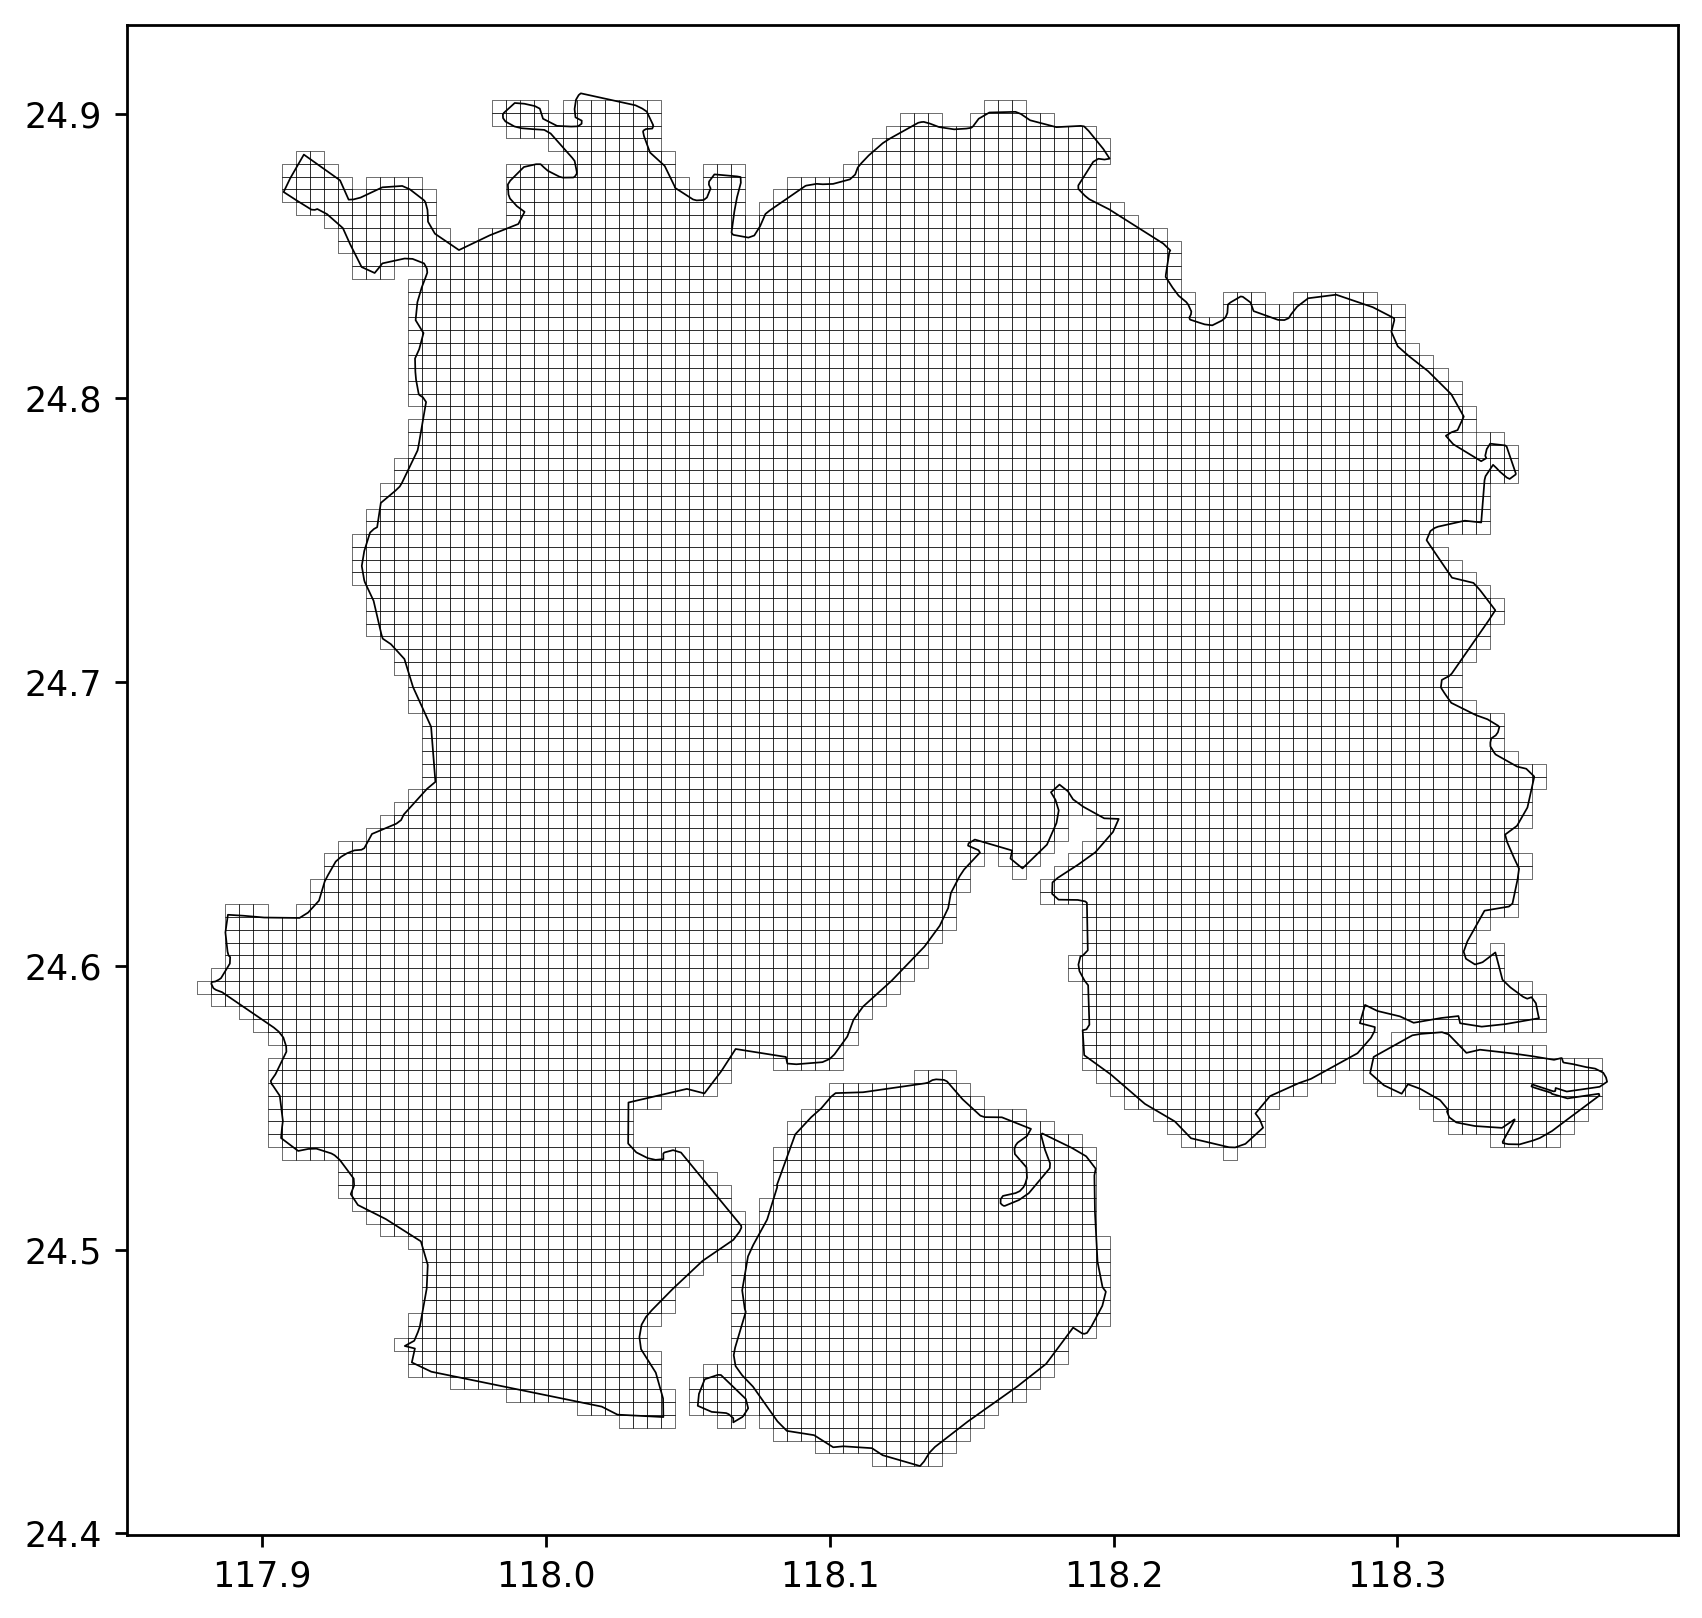

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

fig     = plt.figure(1,(10,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)
grid.plot(ax =ax,edgecolor = (0,0,0,0.8),facecolor = (0,0,0,0),linewidths=0.2)

XM_all = geopandas.GeoDataFrame()
XM_all['geometry'] = [xm.unary_union]
XM_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)

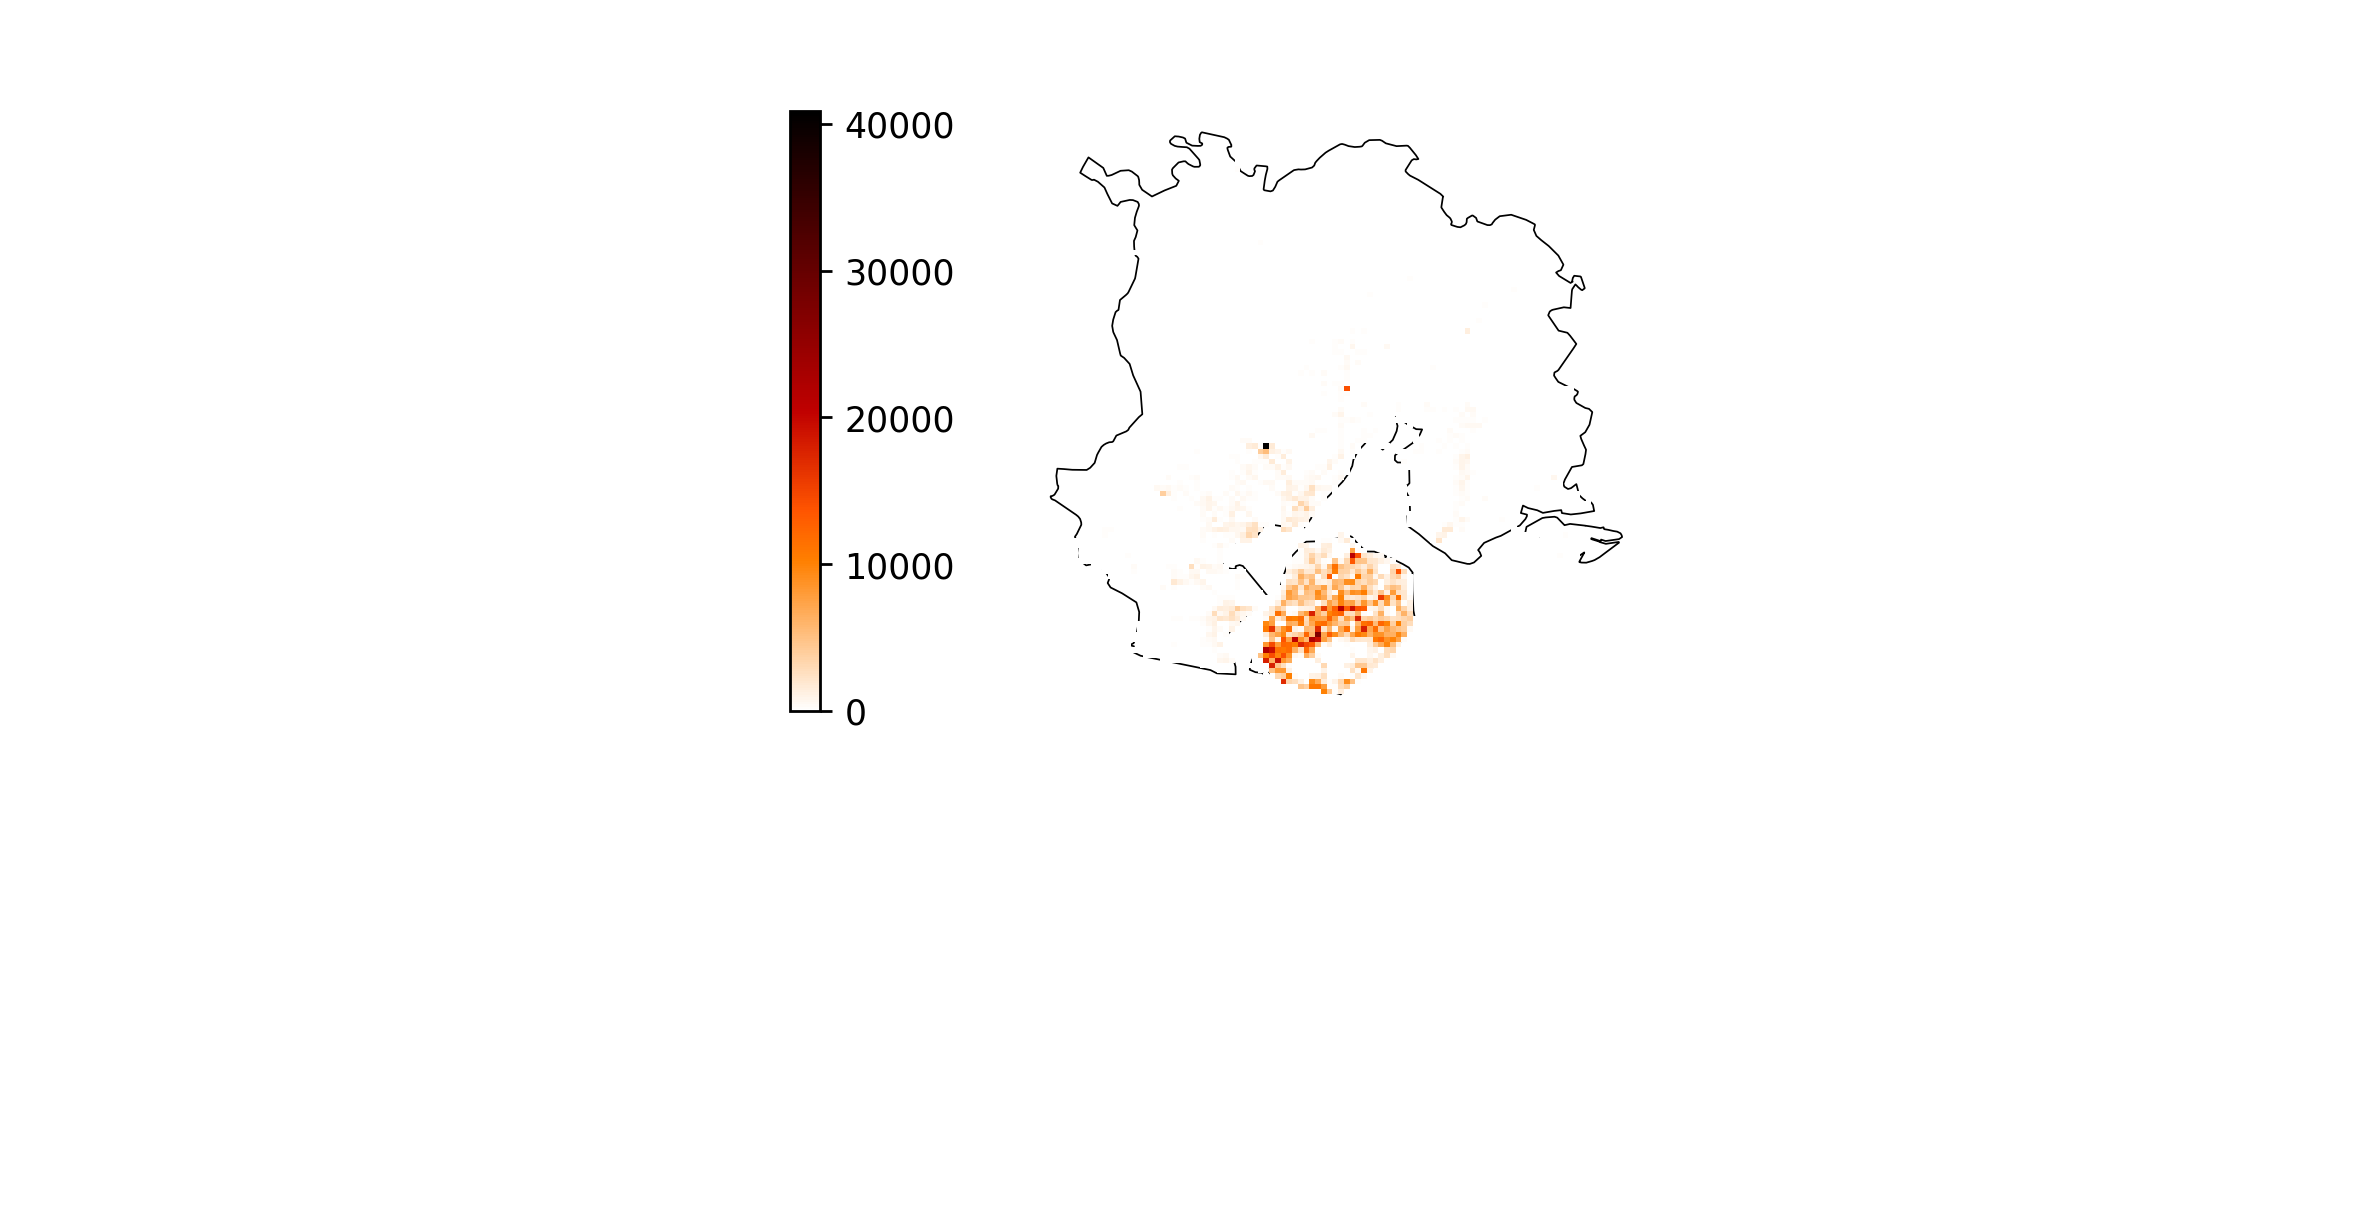

In [17]:
fig     = plt.figure(1,(12,8),dpi = 250)    
ax      = plt.subplot(111)
plt.sca(ax)

#设置colormap
import matplotlib
vmax = gridtoplot['count'].max()
norm = mpl.colors.Normalize(vmin=0,vmax=vmax)
#cmapname = 'YlOrRd'
#cmapname = 'Spectral_r'
cmapname = 'gist_heat_r'
cmap = matplotlib.cm.get_cmap(cmapname)

XM_all.plot(ax = ax,edgecolor = (0,0,0,1),facecolor = (0,0,0,0),linewidths=0.5)
vmax = gridtoplot['count'].max()
gridtoplot.plot(ax = ax,column = 'count',vmax = vmax,vmin = 0,cmap = cmap)

plt.axis('off')    
plt.imshow([[0,vmax]], cmap=cmap)

#colorbar
cax = plt.axes([0.38, 0.45, 0.01, 0.3])
plt.colorbar(cax=cax)

ax.set_xlim(117,119)
ax.set_ylim(24,25)

plt.show()